In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.cm as cm
from sklearn.feature_selection import f_regression
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from tabulate import tabulate
import tabulatehelper as th

In [2]:
data = pd.read_csv('../data/NBA_Players.csv')
data.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PF,PTS,Potw,APG_Leader,MVP,PPG_Leader,RPG_Leader,Rookie,WS_Leader,Salary
0,1991,Alaa Abdelnaby,PF,22.0,POR,43,0,6.7,1.3,2.7,...,0.9,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,395000
1,1991,Mahmoud Abdul-Rauf,PG,21.0,DEN,67,19,22.5,6.2,15.1,...,2.2,14.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1660000
2,1991,Mark Acres,C,28.0,ORL,68,0,19.3,1.6,3.1,...,3.2,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437000
3,1991,Michael Adams,PG,28.0,DEN,66,66,35.5,8.5,21.5,...,2.5,26.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,825000
4,1991,Mark Aguirre,SF,31.0,DET,78,13,25.7,5.4,11.7,...,2.7,14.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1115000


In [3]:
col_salary = ['Year', 'Potw', 'APG_Leader', 'MVP', 'PPG_Leader', 'RPG_Leader', 'Rookie', 'WS_Leader']

#### Full Model

In [4]:
formula_1 = f'Salary ~ {" + ".join(list(col_salary))}'
lm1 = smf.ols(formula_1, data = data).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     338.4
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:11:34   Log-Likelihood:            -1.5001e+05
No. Observations:                9003   AIC:                         3.000e+05
Df Residuals:                    8994   BIC:                         3.001e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.726e+08   1.05e+07    -35.504      0.000   -3.93e+08   -3.52e+08
Year        1.874e+05   5231.501     35.823      0.000    1.77e+05    1.98e+05
Potw        6.327e+06   2.01e+05     31.404      0.000    5.93e+06    6.72e+06
APG_Leader  4.374e+06   1.05e+06      4.165      0.000    2.32e+06    6.43e+06
MVP         1.353e+06   1.14e+06      1.182      0.237    -8.9e+05     3.6e+06
PPG_Leader  3.988e+06   9.28e+05      4.295      0.000    2.17e+06    5.81e+06
RPG_Leader  4.677e+06   7.99e+05      5.856      0.000    3.11e+06    6.24e+06
Rookie     -2.054e+06    9.6e+05     -2.140      0.032   -3.94e+06   -1.73e+05
WS_Leader   2.213e+06   1.16e+06      1.916      0.055   -5.16e+04    4.48e+06
==============================================================================
Omnibus:                     3646.378   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18043.676
Skew:                           1.922   Prob(JB):                         0.00
Kurtosis:                       8.773   Cond. No.                     4.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

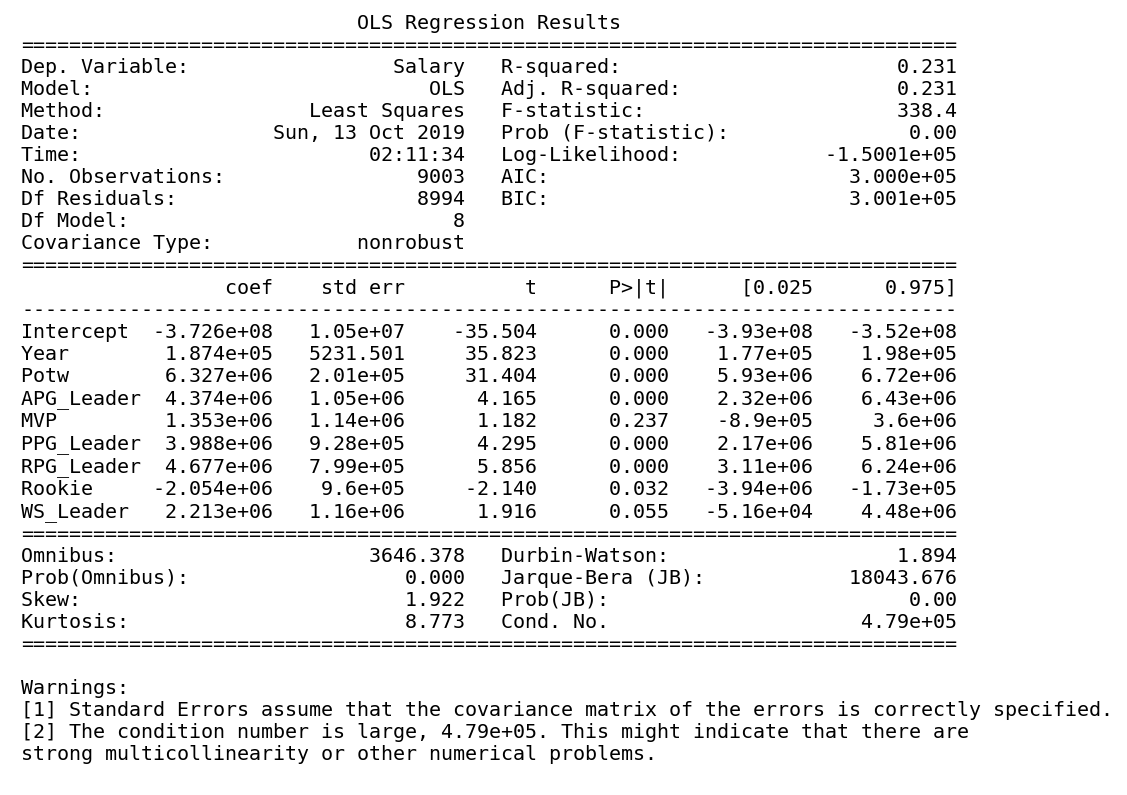

In [5]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm1.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_2_summary_model1.png', dpi = 300, bbox_inches = 'tight')

In [6]:
print(th.md_table(anova_lm(lm1), formats = {-1: 'c'}))

|   df |      sum_sq |     mean_sq |          F |         PR(>F) |
|-----:|------------:|------------:|-----------:|:--------------:|
|    1 | 2.3164e+16  | 2.3164e+16  | 1330.82    |   7.34954e-272 |
|    1 | 2.21228e+16 | 2.21228e+16 | 1271       |   1.67026e-260 |
|    1 | 2.89658e+14 | 2.89658e+14 |   16.6414  |   4.55432e-05  |
|    1 | 3.69627e+14 | 3.69627e+14 |   21.2359  |   4.11687e-06  |
|    1 | 4.0067e+14  | 4.0067e+14  |   23.0193  |   1.6296e-06   |
|    1 | 6.31608e+14 | 6.31608e+14 |   36.2872  |   1.76961e-09  |
|    1 | 8.00524e+13 | 8.00524e+13 |    4.59918 |   0.032014     |
|    1 | 6.38674e+13 | 6.38674e+13 |    3.66932 |   0.0554546    |
| 8994 | 1.56548e+17 | 1.74058e+13 |  nan       | nan            |


#### Check Non-Linearity

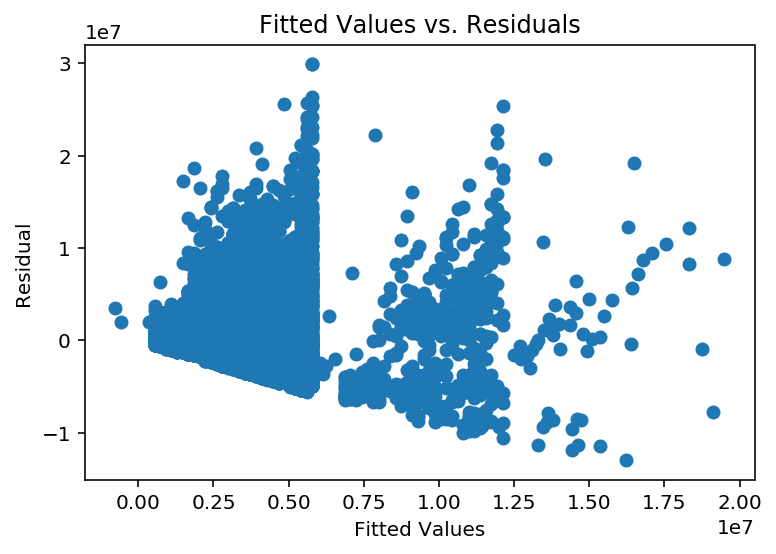

In [7]:
p = lm1.fittedvalues
res = lm1.resid
plt.scatter(p, res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
plt.savefig('../plot/regression_2_residual_model1.png', dpi = 300, bbox_inches = 'tight')

#### Log Transform `y` due to non-linearity

In [8]:
data_log = data.copy()
data_log.Salary = np.log(data_log.Salary)
data_log.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PF,PTS,Potw,APG_Leader,MVP,PPG_Leader,RPG_Leader,Rookie,WS_Leader,Salary
0,1991,Alaa Abdelnaby,PF,22.0,POR,43,0,6.7,1.3,2.7,...,0.9,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.886641
1,1991,Mahmoud Abdul-Rauf,PG,21.0,DEN,67,19,22.5,6.2,15.1,...,2.2,14.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.322328
2,1991,Mark Acres,C,28.0,ORL,68,0,19.3,1.6,3.1,...,3.2,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.987688
3,1991,Michael Adams,PG,28.0,DEN,66,66,35.5,8.5,21.5,...,2.5,26.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.623139
4,1991,Mark Aguirre,SF,31.0,DET,78,13,25.7,5.4,11.7,...,2.7,14.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.924365


#### Refit Full Model

In [9]:
formula_2 = f'Salary ~ {" + ".join(list(col_salary))}'
lm2 = smf.ols(formula_2, data = data_log).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     241.3
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:11:35   Log-Likelihood:                -14245.
No. Observations:                9003   AIC:                         2.851e+04
Df Residuals:                    8994   BIC:                         2.857e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -88.1389      2.963    -29.744      0.000     -93.948     -82.330
Year           0.0511      0.001     34.585      0.000       0.048       0.054
Potw           1.3214      0.057     23.226      0.000       1.210       1.433
APG_Leader     0.6687      0.297      2.255      0.024       0.087       1.250
MVP            0.0916      0.323      0.284      0.777      -0.542       0.725
PPG_Leader     0.5126      0.262      1.955      0.051      -0.001       1.026
RPG_Leader     0.8803      0.225      3.904      0.000       0.438       1.322
Rookie         0.1315      0.271      0.485      0.627      -0.400       0.663
WS_Leader      0.3642      0.326      1.116      0.264      -0.275       1.004
==============================================================================
Omnibus:                      842.715   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.483
Skew:                          -0.709   Prob(JB):                    8.06e-282
Kurtosis:                       4.200   Cond. No.                     4.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

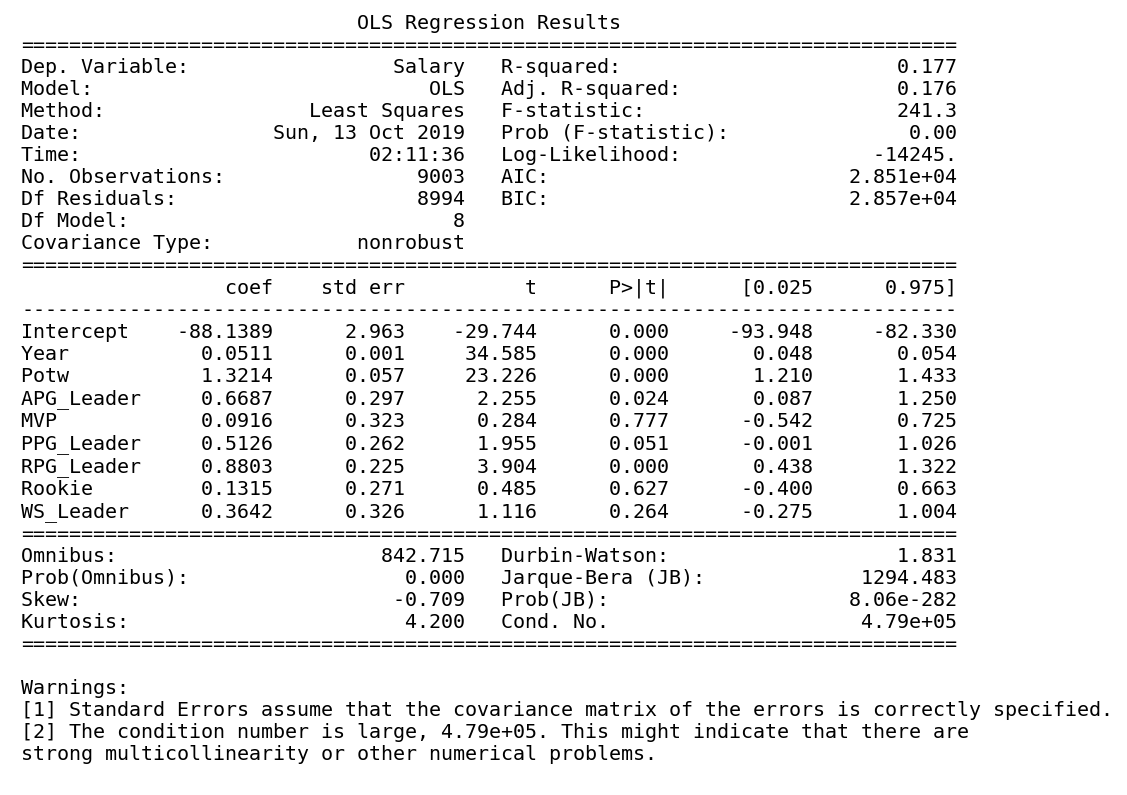

In [10]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm2.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_2_summary_model2.png', dpi = 300, bbox_inches = 'tight')

In [11]:
print(th.md_table(anova_lm(lm2), formats = {-1: 'c'}))

|   df |       sum_sq |     mean_sq |           F |         PR(>F) |
|-----:|-------------:|------------:|------------:|:--------------:|
|    1 |  1709.68     | 1709.68     | 1231.95     |   4.70618e-253 |
|    1 |   926.665    |  926.665    |  667.731    |   4.35078e-142 |
|    1 |     6.77177  |    6.77177  |    4.87956  |   0.0272016    |
|    1 |     5.36321  |    5.36321  |    3.86459  |   0.0493459    |
|    1 |     6.68263  |    6.68263  |    4.81533  |   0.0282331    |
|    1 |    22.0516   |   22.0516   |   15.8898   |   6.76709e-05  |
|    1 |     0.323805 |    0.323805 |    0.233326 |   0.629081     |
|    1 |     1.72901  |    1.72901  |    1.24588  |   0.26437      |
| 8994 | 12481.7      |    1.38778  |  nan        | nan            |


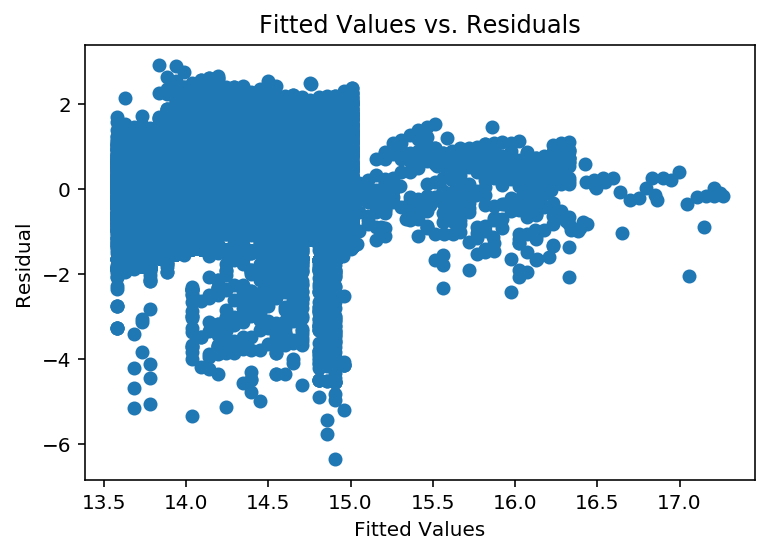

In [12]:
p = lm2.fittedvalues
res = lm2.resid
plt.scatter(p, res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
plt.savefig('../plot/regression_2_residual_model2.png', dpi = 300, bbox_inches = 'tight')

#### Reduced Model -- Drop `MVP`

In [13]:
reduced_col_salary = col_salary.copy()
reduced_col_salary.remove('MVP')
print(reduced_col_salary)

['Year', 'Potw', 'APG_Leader', 'PPG_Leader', 'RPG_Leader', 'Rookie', 'WS_Leader']


In [14]:
formula_3 = f'Salary ~ {" + ".join(reduced_col_salary)}'
lm3 = smf.ols(formula_3, data = data_log).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     275.8
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:11:37   Log-Likelihood:                -14245.
No. Observations:                9003   AIC:                         2.851e+04
Df Residuals:                    8995   BIC:                         2.856e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -88.1395      2.963    -29.746      0.000     -93.948     -82.331
Year           0.0511      0.001     34.587      0.000       0.048       0.054
Potw           1.3231      0.057     23.389      0.000       1.212       1.434
APG_Leader     0.6645      0.296      2.244      0.025       0.084       1.245
PPG_Leader     0.5190      0.261      1.987      0.047       0.007       1.031
RPG_Leader     0.8788      0.225      3.898      0.000       0.437       1.321
Rookie         0.1310      0.271      0.483      0.629      -0.400       0.662
WS_Leader      0.4175      0.267      1.566      0.117      -0.105       0.940
==============================================================================
Omnibus:                      842.769   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.439
Skew:                          -0.709   Prob(JB):                    8.24e-282
Kurtosis:                       4.200   Cond. No.                     4.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

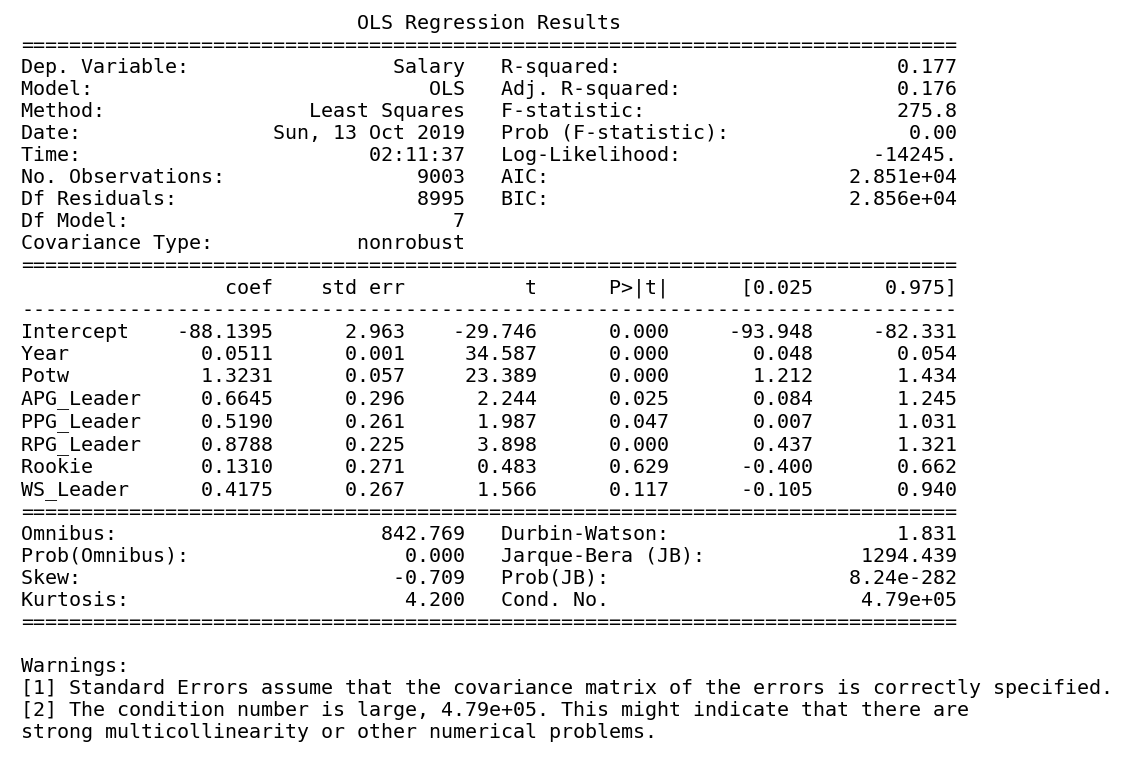

In [15]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm3.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_2_summary_model3.png', dpi = 300, bbox_inches = 'tight')

In [16]:
print(th.md_table(anova_lm(lm3), formats = {-1: 'c'}))

|   df |       sum_sq |     mean_sq |           F |         PR(>F) |
|-----:|-------------:|------------:|------------:|:--------------:|
|    1 |  1709.68     | 1709.68     | 1232.08     |   4.43482e-253 |
|    1 |   926.665    |  926.665    |  667.799    |   4.20922e-142 |
|    1 |     6.77177  |    6.77177  |    4.88006  |   0.0271938    |
|    1 |    10.0137   |   10.0137   |    7.21637  |   0.00723745   |
|    1 |    22.3129   |   22.3129   |   16.0798   |   6.12205e-05  |
|    1 |     0.308828 |    0.308828 |    0.222556 |   0.63711      |
|    1 |     3.40306  |    3.40306  |    2.45241  |   0.11738      |
| 8995 | 12481.8      |    1.38764  |  nan        | nan            |


#### Model Selection using Adjusted R², Mallow's CP, AIC, BIC

In [17]:
from itertools import combinations
def fitModel(df, y, x):
    models = list()
    for i in range(1, len(x) + 1):
        comb = combinations(x, i)
        for params in comb:
            models.append(smf.ols(f'{ y } ~ { "+".join(params) }', data = df).fit())
    return models

In [18]:
models_salary = fitModel(data_log, 'Salary', reduced_col_salary)

In [19]:
r2a_salary = [(list(model.params.index)[1:], model.rsquared_adj) for model in models_salary]
sse_salary = [(list(model.params.index)[1:], sum(model.resid ** 2)) for model in models_salary]
mse_salary = [(list(model.params.index)[1:], model.mse_resid) for model in models_salary]
cp_salary = [(model[0], (model[1] / mse_salary[-1][1] + 2 * (len(model[0]) + 1) - data_log.shape[0])) for model in sse_salary]
aic_salary = [(list(model.params.index)[1:], model.aic) for model in models_salary]
bic_salary = [(list(model.params.index)[1:], model.bic) for model in models_salary]

In [20]:
table_salary = pd.DataFrame()
table_salary['Number of Predictors'] = [len(model[0]) for model in r2a_salary]
table_salary['Adjusted R-Squared'] = [model[1] for model in r2a_salary]
table_salary['Mallows CP'] = [model[1] for model in cp_salary]
table_salary['Predictors'] = [', '.join(model[0]) for model in r2a_salary]
table_salary['AIC'] = [model[1] for model in aic_salary]
table_salary['BIC'] = [model[1] for model in bic_salary]
table_salary.sort_values(by = 'Mallows CP')

,Number of Predictors,Adjusted R-Squared,Mallows CP,Predictors,AIC,BIC
120,6,0.176143,6.233768,"Year, Potw, APG_Leader, PPG_Leader, RPG_Leader...",28505.062452,28554.799644
98,5,0.176011,6.674967,"Year, Potw, APG_Leader, PPG_Leader, RPG_Leader",28505.505428,28548.137307
126,7,0.176073,8.000000,"Year, Potw, APG_Leader, PPG_Leader, RPG_Leader...",28506.828480,28563.670985
102,5,0.175875,8.165699,"Year, Potw, APG_Leader, RPG_Leader, WS_Leader",28506.996919,28549.628797
119,6,0.175940,8.452411,"Year, Potw, APG_Leader, PPG_Leader, RPG_Leader...",28507.282737,28557.019929
...,...,...,...,...,...,...
25,2,0.004600,1876.050377,"RPG_Leader, Rookie",30203.963096,30225.279035
4,1,0.004380,1877.669477,RPG_Leader,30204.959250,30219.169876
20,2,0.001592,1908.913428,"APG_Leader, Rookie",30231.133008,30252.448947
2,1,0.001375,1910.493915,APG_Leader,30232.088270,30246.298896


#### Reduced Model 2 -- Drop `MVP`,`Rookie` and `WS_Leader`

In [21]:
reduced2_col_salary = table_salary.iloc[98].Predictors.split(', ')
print(reduced2_col_salary)

['Year', 'Potw', 'APG_Leader', 'PPG_Leader', 'RPG_Leader']


In [22]:
formula_4 = f'Salary ~ {" + ".join(reduced2_col_salary)}'
lm4 = smf.ols(formula_4, data = data_log).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     385.6
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:11:40   Log-Likelihood:                -14247.
No. Observations:                9003   AIC:                         2.851e+04
Df Residuals:                    8997   BIC:                         2.855e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -88.1045      2.963    -29.734      0.000     -93.913     -82.296
Year           0.0511      0.001     34.575      0.000       0.048       0.054
Potw           1.3347      0.056     23.783      0.000       1.225       1.445
APG_Leader     0.6846      0.296      2.314      0.021       0.105       1.265
PPG_Leader     0.6752      0.241      2.802      0.005       0.203       1.147
RPG_Leader     0.9018      0.225      4.010      0.000       0.461       1.343
==============================================================================
Omnibus:                      842.383   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1293.724
Skew:                          -0.709   Prob(JB):                    1.18e-281
Kurtosis:                       4.200   Cond. No.                     4.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

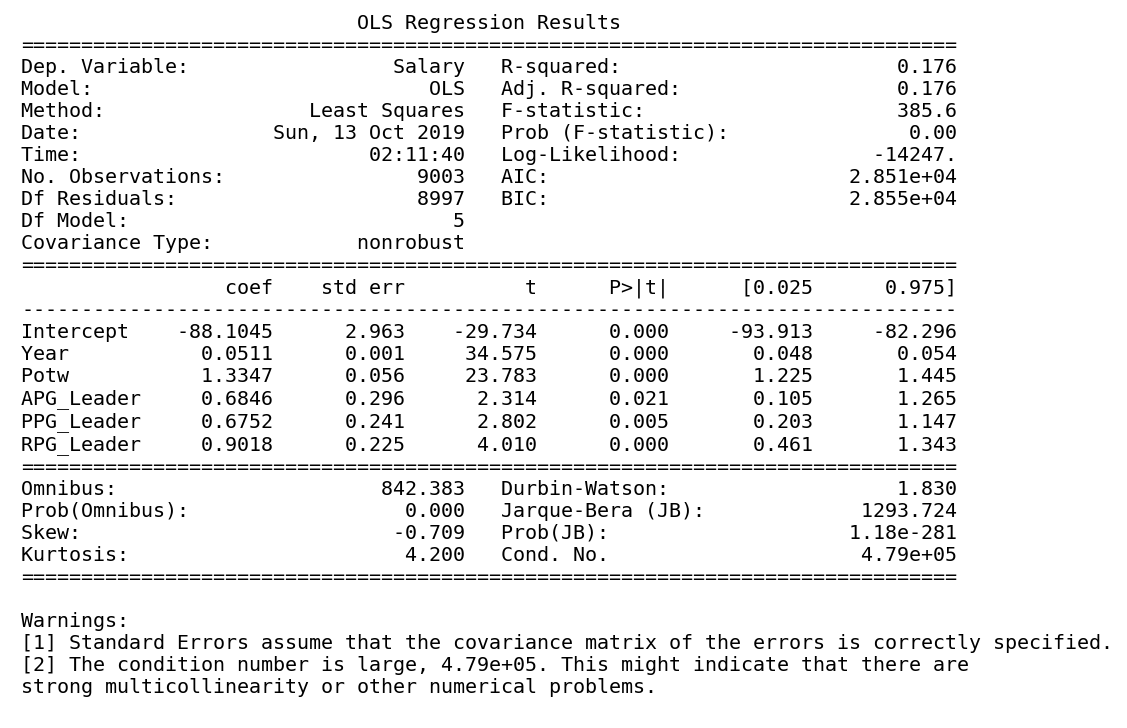

In [23]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm4.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_2_summary_model4.png', dpi = 300, bbox_inches = 'tight')

In [24]:
print(th.md_table(anova_lm(lm4), formats = {-1: 'c'}))

|   df |      sum_sq |    mean_sq |          F |         PR(>F) |
|-----:|------------:|-----------:|-----------:|:--------------:|
|    1 |  1709.68    | 1709.68    | 1231.98    |   4.58256e-253 |
|    1 |   926.665   |  926.665   |  667.749   |   4.29787e-142 |
|    1 |     6.77177 |    6.77177 |    4.8797  |   0.0271995    |
|    1 |    10.0137  |   10.0137  |    7.21582 |   0.00723963   |
|    1 |    22.3129  |   22.3129  |   16.0786  |   6.12594e-05  |
| 8997 | 12485.5     |    1.38774 |  nan       | nan            |


#### Check for Influential Points -- Cook's Distance

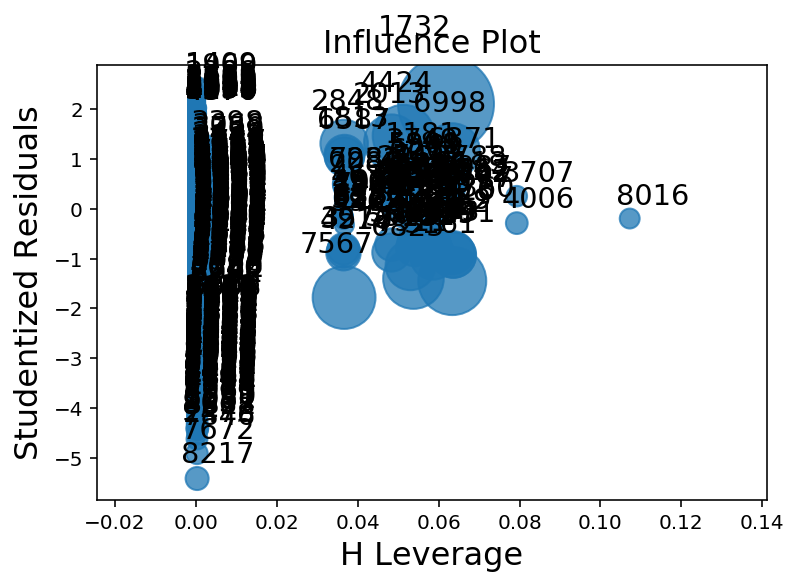

In [25]:
fig = sm.graphics.influence_plot(lm3)
plt.savefig('../plot/regression_2_influence.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [26]:
cooks = lm3.get_influence().cooks_distance[0]
seuil_cooks = 4 / (data.shape[0] - len(lm3.params))
atyp_cooks = np.abs(cooks) > seuil_cooks
print(len(list(data.index[pd.Series(atyp_cooks)])))

126


#### Check Heteroscedasticity -- Breusch-Pagan Test

In [27]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(lm3.resid, lm3.model.exog)
bp_test_table = pd.DataFrame(bp_test).T
bp_test_table.columns = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(th.md_table(bp_test_table, formats = {-1: 'c'}))

|   LM Statistic |   LM-Test p-value |   F-Statistic |   F-Test p-value |
|---------------:|------------------:|--------------:|:----------------:|
|        132.273 |       2.10524e-25 |       19.1609 |      1.36506e-25 |


#### Check Multicollinearity -- VIF

In [28]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(data[reduced2_col_salary].values, i)
                     for i in range(len(reduced2_col_salary))]
vif['Features'] = reduced2_col_salary
print(th.md_table(vif, formats = {-1: 'c'}))

|   VIF Factor | Features   |
|-------------:|:----------:|
|      1.0598  | Year       |
|      1.12948 | Potw       |
|      1.00912 | APG_Leader |
|      1.04567 | PPG_Leader |
|      1.02037 | RPG_Leader |


#### Check Multicollinearity -- Breusch-Godfrey Test

In [29]:
bg_test = sm.stats.diagnostic.acorr_breusch_godfrey(lm3)
bg_test_table = pd.DataFrame(bg_test).T
bg_test_table.columns = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(th.md_table(bg_test_table, formats = {-1: 'c'}))

|   LM Statistic |   LM-Test p-value |   F-Statistic |   F-Test p-value |
|---------------:|------------------:|--------------:|:----------------:|
|        208.469 |       3.65569e-26 |       5.89911 |      1.70443e-26 |


#### Check Normality

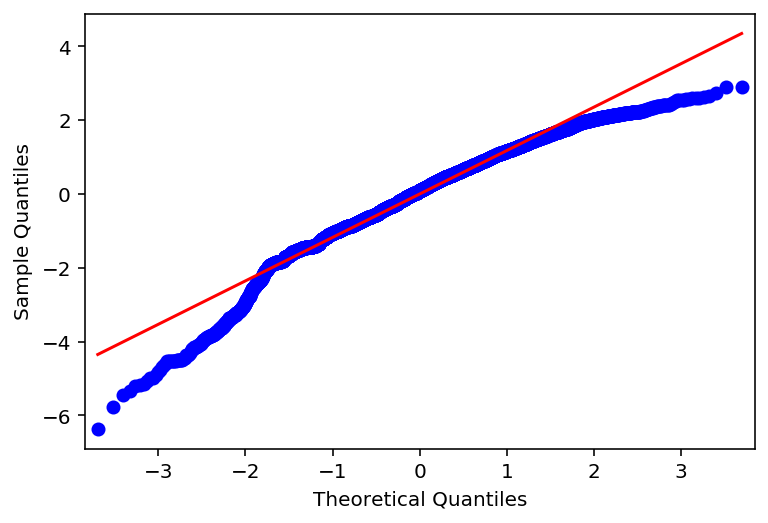

In [30]:
fig = sm.qqplot(lm3.resid, line = 's')
plt.savefig('../plot/regression_2_normailty.png', dpi = 300, bbox_inches = 'tight')

In [31]:
beta = pd.DataFrame(lm4.params).T
print(th.md_table(beta, formats = {-1: 'c'}))

|   Intercept |      Year |    Potw |   APG_Leader |   PPG_Leader |   RPG_Leader |
|------------:|----------:|--------:|-------------:|-------------:|:------------:|
|    -88.1045 | 0.0510719 | 1.33466 |     0.684587 |     0.675161 |     0.901754 |
